In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [2]:
sales_data = pd.read_csv("FedCycleData071012-2.csv", usecols=['CycleNumber','LengthofCycle'],nrows=40)

In [3]:
sales_data.head()


,CycleNumber,LengthofCycle
0,1,29
1,2,27
2,3,29
3,4,27
4,5,28


<AxesSubplot:>

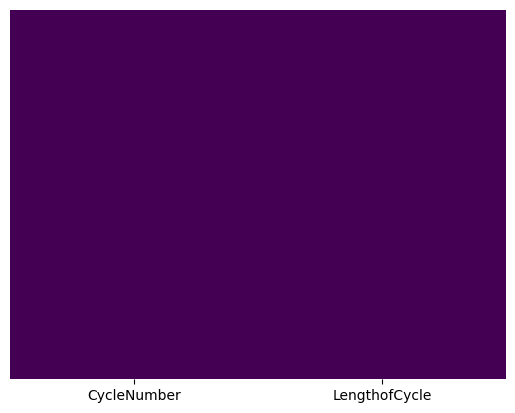

In [4]:
#Make sure there are no null values
sns.heatmap(sales_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
sales_data.isnull().value_counts()

CycleNumber  LengthofCycle
False        False            40
dtype: int64

In [6]:
#Check the datatypes
print(sales_data.dtypes)

CycleNumber      int64
LengthofCycle    int64
dtype: object


In [7]:
sales_data['CycleNumber']=pd.to_datetime(sales_data['CycleNumber'])

In [8]:
sales_data.dtypes

CycleNumber      datetime64[ns]
LengthofCycle             int64
dtype: object

In [9]:
sales_data.head()

,CycleNumber,LengthofCycle
0,1970-01-01 00:00:00.000000001,29
1,1970-01-01 00:00:00.000000002,27
2,1970-01-01 00:00:00.000000003,29
3,1970-01-01 00:00:00.000000004,27
4,1970-01-01 00:00:00.000000005,28


<AxesSubplot:xlabel='CycleNumber', ylabel='LengthofCycle'>

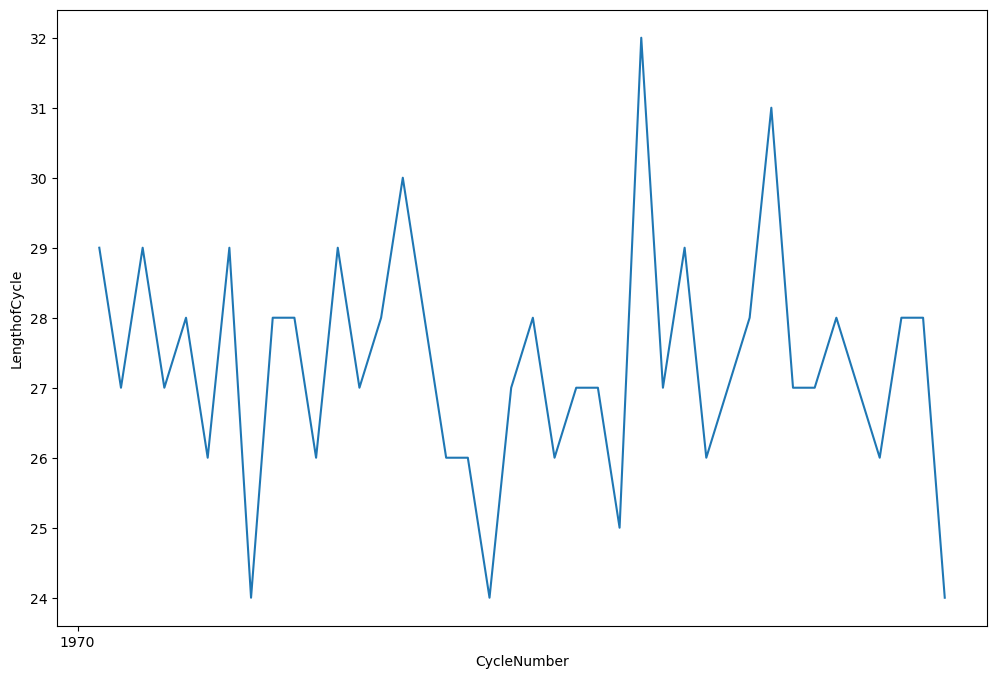

In [10]:
# To understand the pattern
plt.figure(figsize=(12,8))
sns.lineplot(data=sales_data, x='CycleNumber', y= 'LengthofCycle')

In [11]:
#Set the index of the Month 
sales_data.set_index('CycleNumber',inplace=True)


In [12]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.09680952909137129, True)

<AxesSubplot:xlabel='CycleNumber'>

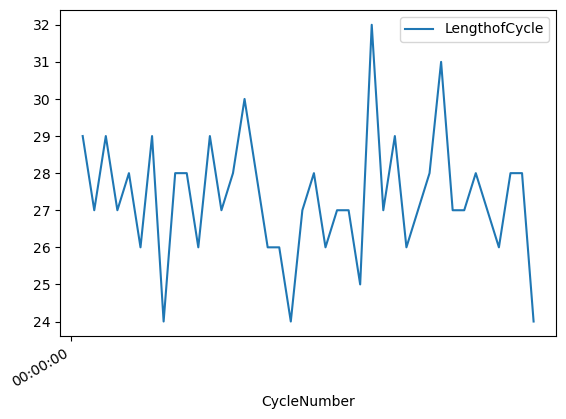

In [13]:
sales_data.plot()

In [14]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Function to make a time series stationary
def make_stationary(timeseries):
    d = 0
    p_value = 1
    while p_value > 0.05:
        # Perform Dickey-Fuller test
        dftest = adfuller(timeseries, autolag='AIC')
        p_value = dftest[1]
        if p_value > 0.05:
            timeseries = timeseries.diff().dropna()
            d += 1
    return timeseries, d

# Example usage
timeseries = sales_data
stationary_series, d = make_stationary(timeseries)
print(f'Number of differencing: {d}')


Number of differencing: 0


In [15]:
#testing for stationarity
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Function to check if time series is stationary
def is_stationary(timeseries):
    # Perform Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    p_value = dftest[1]
    if p_value <= 0.05:
        return True
    else:
        return False

# Example usage
timeseries = sales_data
result = is_stationary(timeseries)
print(result)


True


In [16]:
# spilting the dataset
from sklearn.model_selection import train_test_split

X = sales_data # dataset

train_size = 0.75
test_size = 1 - train_size

X_train, X_test = train_test_split(X, train_size=train_size, test_size=test_size, shuffle=False)


In [17]:
X_train.tail()

,LengthofCycle
CycleNumber,
1970-01-01 00:00:00.000000026,32
1970-01-01 00:00:00.000000027,27
1970-01-01 00:00:00.000000028,29
1970-01-01 00:00:00.000000029,26
1970-01-01 00:00:00.000000030,27


In [18]:
X_test.tail()

,LengthofCycle
CycleNumber,
1970-01-01 00:00:00.000000036,27
1970-01-01 00:00:00.000000037,26
1970-01-01 00:00:00.000000038,28
1970-01-01 00:00:00.000000039,28
1970-01-01 00:00:00.000000040,24


In [19]:
X_test.head()

,LengthofCycle
CycleNumber,
1970-01-01 00:00:00.000000031,28
1970-01-01 00:00:00.000000032,31
1970-01-01 00:00:00.000000033,27
1970-01-01 00:00:00.000000034,27
1970-01-01 00:00:00.000000035,28


Text(0, 0.5, 'CycleLength')

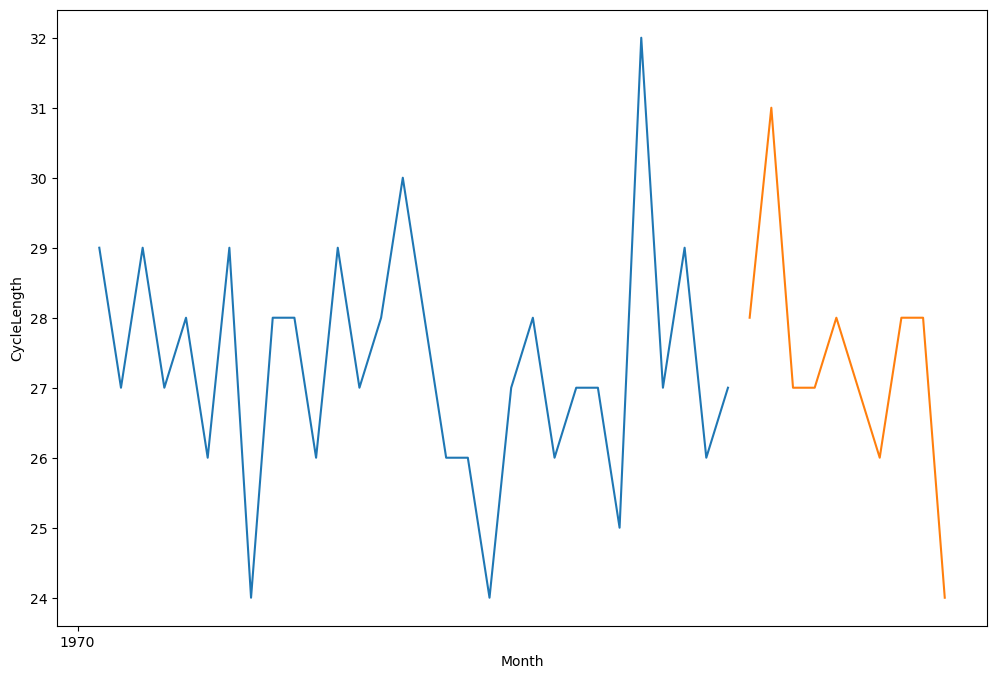

In [21]:
plt.figure(figsize=(12,8))
plt.plot(X_train)
plt.plot(X_test)
plt.xlabel('Month')
plt.ylabel('CycleLength')



In [22]:
arima_model =  auto_arima(X_train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=1, seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=143.416, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=127.890, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=141.435, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=127.386, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=129.384, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=125.470, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=125.956, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=127.469, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best mode

In [23]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 11),index=X_test.index)
prediction.columns = ['predicted_Cyclelength']
prediction

,predicted_Cyclelength
CycleNumber,
1970-01-01 00:00:00.000000031,27.000723
1970-01-01 00:00:00.000000032,26.712620
1970-01-01 00:00:00.000000033,26.960676
1970-01-01 00:00:00.000000034,26.829746
1970-01-01 00:00:00.000000035,26.871259
1970-01-01 00:00:00.000000036,26.873126
1970-01-01 00:00:00.000000037,26.859583
1970-01-01 00:00:00.000000038,26.870717
1970-01-01 00:00:00.000000039,26.865016


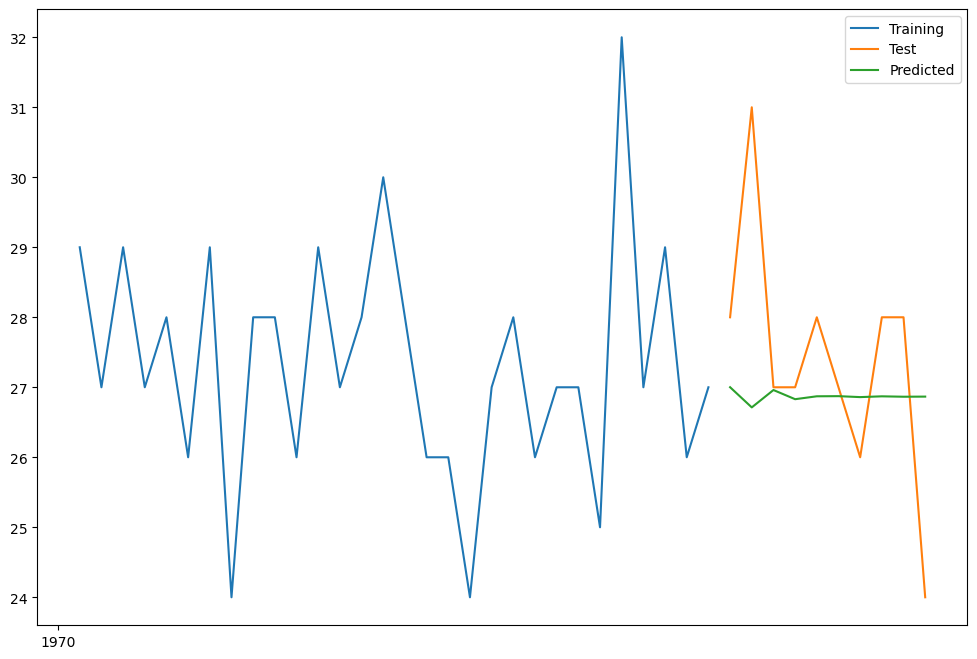

In [25]:
plt.figure(figsize=(12,8))
plt.plot(X_train,label="Training")
plt.plot(X_test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [62]:
future_predictions = arima_model.predict(n_periods=10)

future_predictions_df = pd.DataFrame(future_predictions, index=pd.date_range(start=X_test.index[-1], periods=10, freq='D'))
future_predictions_df.columns = ['predicted_Cyclelength']


In [63]:
print(future_predictions)

1970-01-01 00:00:00.000000041    27.321807
1970-01-01 00:00:00.000000042    25.921699
1970-01-01 00:00:00.000000043    25.956259
1970-01-01 00:00:00.000000044    26.403067
1970-01-01 00:00:00.000000045    26.020277
1970-01-01 00:00:00.000000046    26.186420
1970-01-01 00:00:00.000000047    26.178451
1970-01-01 00:00:00.000000048    26.128643
1970-01-01 00:00:00.000000049    26.172712
1970-01-01 00:00:00.000000050    26.153031
Freq: N, dtype: float64


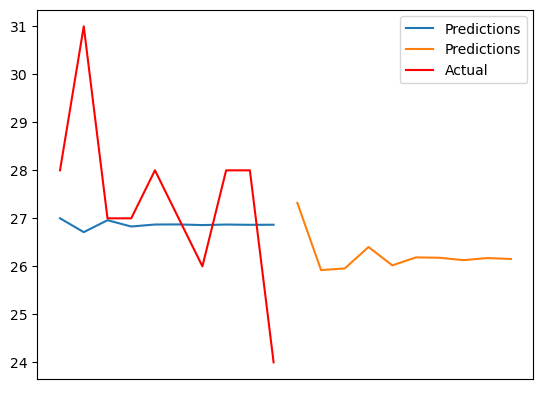

In [67]:
# Concatenate the past values and future predictions
all_predictions = pd.concat([prediction, future_predictions])

# Plot the past values and future predictions
plt.plot(all_predictions, label = 'Predictions')
plt.plot(X_test, label = 'Actual', color='r')
plt.legend(loc='best')
plt.show()
